In [2]:
%cd /content
!git clone https://github.com/samay-patel-2110/MeshCNN_3DVSS/

/content
fatal: destination path 'MeshCNN_3DVSS' already exists and is not an empty directory.


In [2]:
%cd MeshCNN_3DVSS/
!pwd

/content/MeshCNN_3DVSS
/content/MeshCNN_3DVSS


In [3]:
# if you get compatibility issue regarding matplotlib or numpy, you can just just restart session and continue
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'



## Get SHREC16 Dataset -> Classification

In [4]:
%cd /content/MeshCNN_3DVSS/
!pwd

/content/MeshCNN_3DVSS
/content/MeshCNN_3DVSS


In [5]:
# get data
DATADIR = 'datasets'

!mkdir -p $DATADIR && cd $DATADIR
!wget https://www.dropbox.com/s/w16st84r6wc57u7/shrec_16.tar.gz
!tar -xzvf shrec_16.tar.gz && rm shrec_16.tar.gz
!echo "downloaded the data and putting it in: " $DATADIR
!mv shrec_16 $DATADIR

# ## 2. Dataset Structure
# The dataset should be organized as follows:
# ```
# datasets/
# └── shrec_16/
#     ├── laptop/
#     │   ├── train/
#     │   ├── test/
#     │   └── val/
#     └── ...
# ```

--2025-06-24 10:46:34--  https://www.dropbox.com/s/w16st84r6wc57u7/shrec_16.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/w3f3fflwb96zy669mvsuc/shrec_16.tar.gz?rlkey=xabe3lllljyf1jctrqnb5ss20 [following]
--2025-06-24 10:46:34--  https://www.dropbox.com/scl/fi/w3f3fflwb96zy669mvsuc/shrec_16.tar.gz?rlkey=xabe3lllljyf1jctrqnb5ss20
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9b88c8b429362ced256de09e87.dl.dropboxusercontent.com/cd/0/inline/CsOTrMAYgh8q98cRz8pG6Idss2c1srYsAovicjT7w79K_jAnvF2phmKd23EYcZnuxTtM0iTixdl1oH3AAyZTFsenaLfv_pdnu-Uscz1pr7YqvLHl_4p2qUhoJMAr5i72_7Y/file# [following]
--2025-06-24 10:46:35--  https://uc9b88c8b429362ced256de09e87.dl.dropboxusercontent.com/cd/0/inline/CsOTrMAYgh8q9

In [6]:
import os

# Initialize variables
classes = []
class_counts = {}

# Get the base directory
base_dir = os.path.join('datasets', 'shrec_16')

# Iterate through all subdirectories in shrec_16
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        classes.append(class_name)

        # Count total items across train/test/val
        total_items = 0
        for split in ['train', 'test', 'val']:
            split_path = os.path.join(class_path, split)
            if os.path.exists(split_path):
                total_items += len([f for f in os.listdir(split_path) if f.endswith('.obj')])

        class_counts[class_name] = total_items

# Calculate number of classes
num_classes = len(classes)

# Print results
print(f"Number of classes: {num_classes}")
print("\nItems per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} items")


Number of classes: 30

Items per class:
myScissor: 20 items
horse: 20 items
octopus: 20 items
snake: 20 items
man: 20 items
centaur: 20 items
shark: 20 items
dog2: 20 items
glasses: 20 items
santa: 20 items
spiders: 20 items
bird2: 20 items
pliers: 20 items
rabbit: 20 items
cat: 20 items
laptop: 20 items
dino_ske: 20 items
alien: 20 items
ants: 20 items
two_balls: 20 items
dog1: 20 items
hand: 20 items
bird1: 20 items
lamp: 20 items
camel: 20 items
dinosaur: 20 items
gorilla: 20 items
armadillo: 20 items
woman: 20 items
flamingo: 20 items


# Get HumanSEG Dataset -> Segmentation

In [7]:
DATADIR='datasets' #location where data gets downloaded to

# get data
!echo "downloading the data and putting it in: " $DATADIR
!mkdir -p $DATADIR && cd $DATADIR
!wget https://www.dropbox.com/s/s3n05sw0zg27fz3/human_seg.tar.gz
!tar -xzvf human_seg.tar.gz && rm human_seg.tar.gz
!mv human_seg/ $DATADIR

downloading the data and putting it in:  datasets
--2025-06-24 10:46:50--  https://www.dropbox.com/s/s3n05sw0zg27fz3/human_seg.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/r04ahap6vhuwzkjj9mpwk/human_seg.tar.gz?rlkey=dyjwx6ehxmarvtrzl6atvs9mz [following]
--2025-06-24 10:46:50--  https://www.dropbox.com/scl/fi/r04ahap6vhuwzkjj9mpwk/human_seg.tar.gz?rlkey=dyjwx6ehxmarvtrzl6atvs9mz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc25534906a85f0ba029c98f19f0.dl.dropboxusercontent.com/cd/0/inline/CsNJ8Wyy1mFeZccZsA6vFtT_qVc39WzZ_j_iqOpC8pnTmLlrL3arrqcaWTjKESFqrLDFj69spT4jztvR_xaJQRtbxIdvwoQIyKqP36yUmheiKCL0g34a57WaNfRgGdkJPA8/file# [following]
--2025-06-24 10:46:50--  https://uc25534906a85f0ba029c98f19f

# Features extraction from Mesh

In [8]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from models.layers.mesh_prepare import from_scratch
from trimesh.transformations import rotation_matrix, translation_matrix

In [9]:
mesh_file = './datasets/shrec_16/laptop/train/T17.obj'

In [10]:
def build_gemm_explain(mesh, faces, face_areas):
    """
    gemm_edges: array (#E x 4) of the 4 one-ring neighbors for each edge
    sides: array (#E x 4) indices (values of: 0,1,2,3) indicating where an edge is in the gemm_edge entry of the 4 neighboring edges
    for example edge i -> gemm_edges[gemm_edges[i], sides[i]] == [i, i, i, i]
    """
    print("Initializing data structures...")
    mesh.ve = [[] for _ in mesh.vs]  # Vertex to edge mapping
    edge_nb = []  # Edge neighbors
    sides = []    # Side indices
    edge2key = dict()  # Edge to index mapping
    edges = []    # List of edges
    edges_count = 0
    nb_count = []  # Neighbor count per edge

    print(f"Processing {len(faces)} faces...")
    for face_id, face in enumerate(faces):
        print(f"\nProcessing face {face_id}: {face}")
        faces_edges = []

        # Get edges for current face
        for i in range(3):
            cur_edge = (face[i], face[(i + 1) % 3])
            faces_edges.append(cur_edge)
        print(f"Face edges before sorting: {faces_edges}")

        # Process each edge
        for idx, edge in enumerate(faces_edges):
            edge = tuple(sorted(list(edge)))  # Sort vertices to ensure consistent edge representation
            faces_edges[idx] = edge
            print(f"Processing edge {edge}")

            if edge not in edge2key:
                print(f"New edge found: {edge}")
                edge2key[edge] = edges_count
                edges.append(list(edge))
                edge_nb.append([-1, -1, -1, -1])  # Initialize 4 neighbors as -1
                sides.append([-1, -1, -1, -1])    # Initialize 4 sides as -1
                mesh.ve[edge[0]].append(edges_count)  # Add edge to vertex 0's edge list
                mesh.ve[edge[1]].append(edges_count)  # Add edge to vertex 1's edge list
                mesh.edge_areas.append(0)
                nb_count.append(0)
                edges_count += 1

            # Update edge areas
            mesh.edge_areas[edge2key[edge]] += face_areas[face_id] / 3
            print(f"Updated edge areas for edge {edge}: {mesh.edge_areas[edge2key[edge]]}")

        # Set up edge neighbors
        for idx, edge in enumerate(faces_edges):
            edge_key = edge2key[edge]
            print(f"\nSetting up neighbors for edge {edge} (key: {edge_key})")

            # Connect to next edge in face
            next_edge = faces_edges[(idx + 1) % 3]
            edge_nb[edge_key][nb_count[edge_key]] = edge2key[next_edge]
            print(f"Connected to next edge {next_edge} (key: {edge2key[next_edge]})")

            # Connect to previous edge in face
            prev_edge = faces_edges[(idx + 2) % 3]
            edge_nb[edge_key][nb_count[edge_key] + 1] = edge2key[prev_edge]
            print(f"Connected to previous edge {prev_edge} (key: {edge2key[prev_edge]})")

            nb_count[edge_key] += 2

        # Set up side indices
        for idx, edge in enumerate(faces_edges):
            edge_key = edge2key[edge]
            print(f"\nSetting up sides for edge {edge} (key: {edge_key})")

            # Calculate side indices for connections
            sides[edge_key][nb_count[edge_key] - 2] = nb_count[edge2key[faces_edges[(idx + 1) % 3]]] - 1
            sides[edge_key][nb_count[edge_key] - 1] = nb_count[edge2key[faces_edges[(idx + 2) % 3]]] - 2
            print(f"Updated sides: {sides[edge_key]}")

    print("\nFinalizing mesh data...")
    mesh.edges = np.array(edges, dtype=np.int32)
    mesh.gemm_edges = np.array(edge_nb, dtype=np.int64)
    mesh.sides = np.array(sides, dtype=np.int64)
    mesh.edges_count = edges_count
    mesh.edge_areas = np.array(mesh.edge_areas, dtype=np.float32) / np.sum(face_areas)

    print(f"Final statistics:")
    print(f"Total edges: {edges_count}")
    print(f"Edge areas shape: {mesh.edge_areas.shape}")
    print(f"Gemm edges shape: {mesh.gemm_edges.shape}")
    print(f"Sides shape: {mesh.sides.shape}")

In [11]:
x = from_scratch(mesh_file, [0])

In [12]:
x.edges

array([[236, 249],
       [228, 249],
       [228, 236],
       ...,
       [100, 102],
       [115, 130],
       [ 86, 102]], dtype=int32)

In [13]:
x.sides

array([[1, 0, 3, 0],
       [1, 0, 1, 2],
       [1, 0, 1, 2],
       ...,
       [3, 2, 3, 2],
       [3, 2, 3, 2],
       [3, 2, 3, 2]])

In [14]:
x.gemm_edges

array([[  1,   2,  26,  27],
       [  2,   0,   8,   6],
       [  0,   1, 430,  14],
       ...,
       [320, 746, 742, 749],
       [734, 731, 324, 737],
       [334, 327, 747, 742]])

In [15]:
import matplotlib as plt
# We tranform mesh by applying rotation, transformation and scale to verify invariance
def plot_meshes(mesh1, mesh2, titles=('Original', 'Transformed')):
    fig = plt.figure(figsize=(12, 6))
    for i, mesh in enumerate([mesh1, mesh2]):
        ax = fig.add_subplot(1, 2, i+1, projection='3d')
        ax.plot_trisurf(mesh.vertices[:,0], mesh.vertices[:,1], mesh.faces, mesh.vertices[:,2], color='lightblue', edgecolor='gray', alpha=0.8)
        ax.set_title(titles[i])
        ax.set_axis_off()
    plt.show()

def transform_mesh(obj_path):
    mesh_orig = trimesh.load(obj_path, process=False)

    scale = 1.5
    theta = np.radians(30)

    Rz = np.array([
        [np.cos(theta), -np.sin(theta), 0, 2],
        [np.sin(theta),  np.cos(theta), 0, 3],
        [0,              0,             1, 1],
        [0,              0,             0, 1]
    ])
    S = np.diag([scale, scale, scale, 1])

    mesh_trans = mesh_orig.copy()

    mesh_trans.apply_transform(Rz @ S)

    trans_obj_path = 'example_transformed.obj'
    mesh_trans.export(trans_obj_path)

    # plot_meshes(mesh_orig, mesh_trans)
transform_mesh(mesh_file)

In [16]:
# Sometimes the order of faces change after transform,
# so we will have a check before we proceed
def get_faces(mesh_file):
    vs, faces = [], []

    f = open(mesh_file)
    for line in f:
        line = line.strip()
        splitted_line = line.split()
        if not splitted_line:
            continue
        elif splitted_line[0] == 'v':
            vs.append([float(v) for v in splitted_line[1:4]])
        elif splitted_line[0] == 'f':
            face_vertex_ids = [int(c.split('/')[0]) for c in splitted_line[1:]]
            assert len(face_vertex_ids) == 3
            face_vertex_ids = [(ind - 1) if (ind >= 0) else (len(vs) + ind)
                                for ind in face_vertex_ids]
            faces.append(face_vertex_ids)

    f.close()
    vs = np.asarray(vs)
    faces = np.asarray(faces, dtype=int)

    return faces

f = get_faces(mesh_file)
t_f = get_faces('example_transformed.obj')

In [17]:
np.unique(t_f == f)

array([ True])

In [18]:
x = from_scratch(mesh_file, [0])
y = from_scratch('example_transformed.obj', [0])

In [19]:
scene = trimesh.Scene([trimesh.load(mesh_file), trimesh.load("example_transformed.obj")])
scene.show()

In [20]:
np.unique(x.edges == y.edges)

array([ True])

In [21]:
np.round(np.mean(x.features),5)

1.18176

In [22]:
np.round(np.mean(y.features), 5)

1.21498

In [23]:
# Find the difference between the features for both the meshes
diff = []
for i in range(y.features.shape[0]):
    diff.append(np.sum(y.features[i,:] - x.features[i,:]))
diff

[160.29432132170552,
 -23.342393602675692,
 -10.704673837735603,
 -0.9272598779794037,
 -0.7289416851767339]

# Classification

In [24]:
#!/usr/bin/env bash

CHECKPOINT='checkpoints/shrec16'

!mkdir -p $CHECKPOINT
!wget https://www.dropbox.com/s/wqq1qxj4fjbpfas/shrec16_wts.tar.gz
!tar -xzvf shrec16_wts.tar.gz && rm shrec16_wts.tar.gz
!mv latest_net.pth $CHECKPOINT
!echo "downloaded pretrained weights to" $CHECKPOINT

--2025-06-24 10:52:54--  https://www.dropbox.com/s/wqq1qxj4fjbpfas/shrec16_wts.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/r2d6rwwg3kqbll79launi/shrec16_wts.tar.gz?rlkey=cwd6i033qe11q2qfrcma0jod3 [following]
--2025-06-24 10:52:54--  https://www.dropbox.com/scl/fi/r2d6rwwg3kqbll79launi/shrec16_wts.tar.gz?rlkey=cwd6i033qe11q2qfrcma0jod3
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c3c5a769c51c2e4de72a1220d.dl.dropboxusercontent.com/cd/0/inline/CsM0pL18k4g1GgWI-y6gzRCDCVEdwHgpsndCVXf3q6n7vO4olG7WsH16bTufqW0070g4GYKqX-s_0qTMh35_R3HRUTdoRT9T82AzNZbfBb9MBENgkp_aIcsvnlcePTOLDJE/file# [following]
--2025-06-24 10:52:54--  https://uc3c3c5a769c51c2e4de72a1220d.dl.dropboxusercontent.com/cd/0/inline/CsM0

In [25]:
## run the test and export collapses

# Processing batch of 16 meshes
# Forward pass -> compute correct classification -> outputs confsion matrix

# it will generate your running mean and std
# it will generate mesh results as well as mesh at each step and store it in checkpoints folder

!python test.py \
--dataroot datasets/shrec_16 \
--name shrec16 \
--ncf 64 128 256 256 \
--pool_res 600 450 300 180 \
--norm group \
--resblocks 1 \
--export_folder meshes \

# Check out the confusion matrix in the folder saved as .png

# For training the scripts are provided in scripts folder in their respective dataset subfolder

Running Test
computing mean std from train data...
0 of 120
saved:  datasets/shrec_16/mean_std_cache.p
loaded mean / std from cache
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
loading the model from ./checkpoints/shrec16/latest_net.pth
epoch: -1, TEST ACC: [76.667 %]



In [26]:
# ## run the training
# !python train.py \
# --dataroot datasets/shrec_16 \
# --name shrec16 \
# --ncf 64 128 256 256 \
# --pool_res 600 450 300 180 \
# --norm group \
# --resblocks 1 \
# --flip_edges 0.2 \
# --slide_verts 0.2 \
# --num_aug 20 \
# --niter_decay 100 \

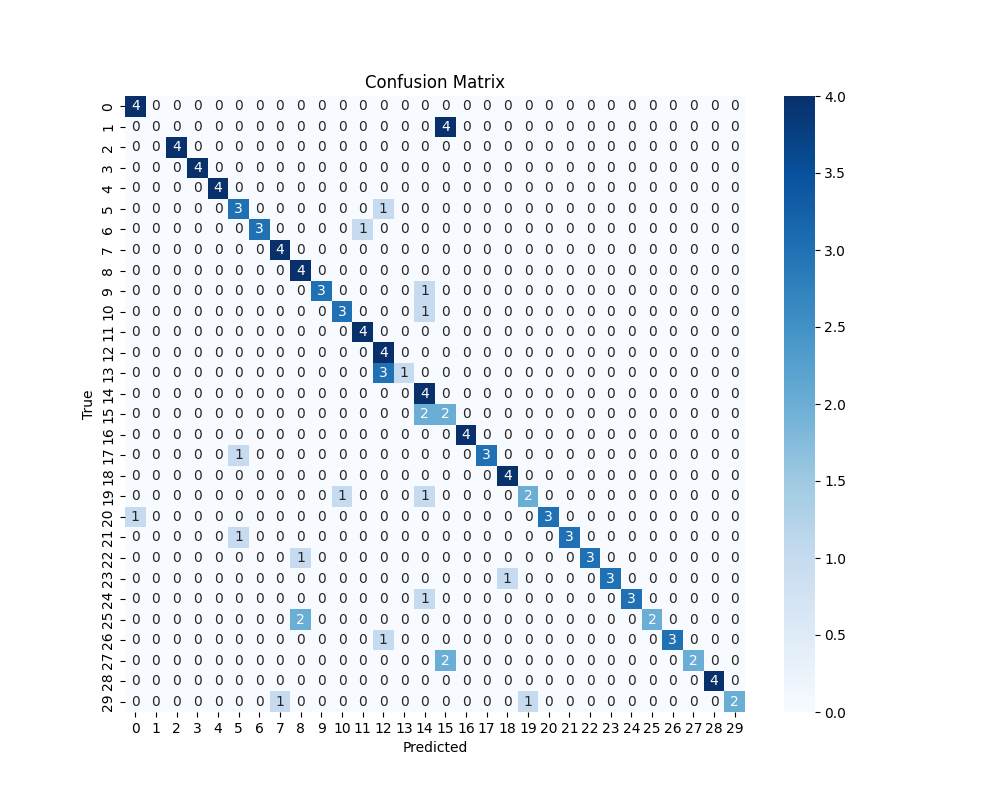

In [27]:
from IPython.display import Image, display
import os

confusion_matrix_path = './confusion_matrix_shrec16.png'
display(Image(filename=confusion_matrix_path))

## Visualize Edge Collapse

In [28]:
# Visualize the Mesh
item = 1
mesh = trimesh.load(f'checkpoints/shrec16/meshes/T{item}_0.obj')
scene = trimesh.Scene(mesh)
scene.show(flags={'cull': False, 'wireframe': True})

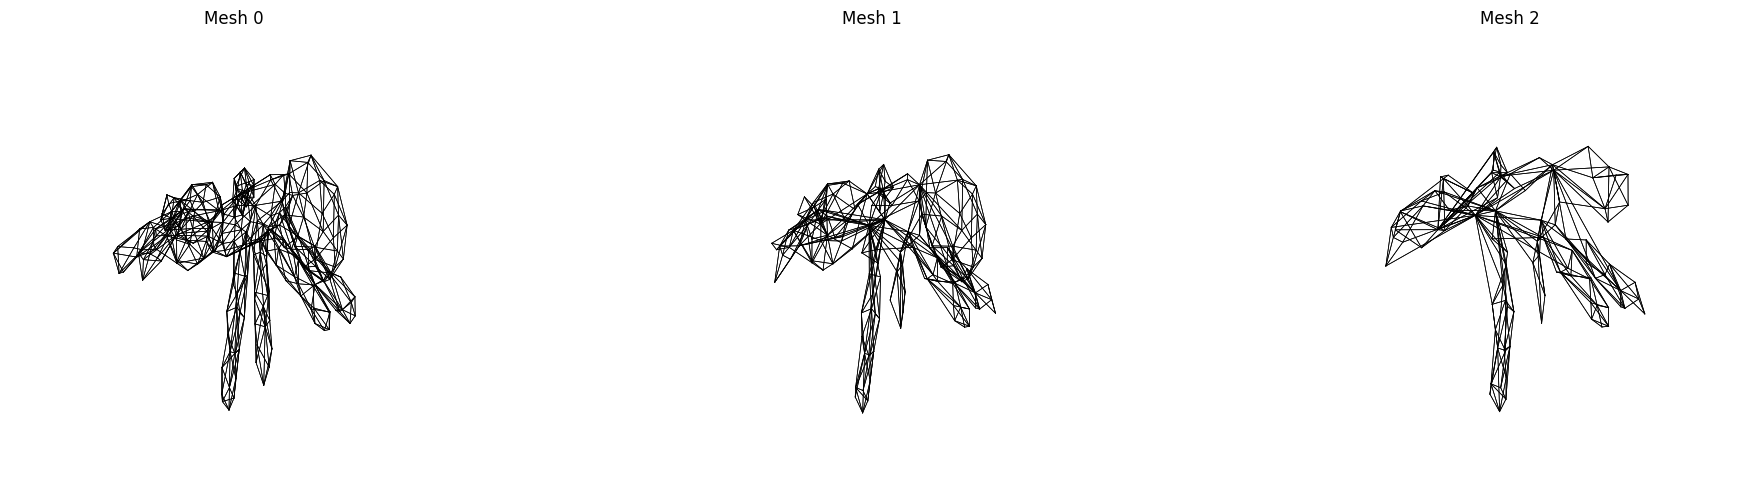

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

meshes = []
for i in range(4):
    if i == 1 :
        continue
    mesh = trimesh.load(f'checkpoints/shrec16/meshes/T{item}_{i}.obj')
    meshes.append(mesh)

fig = plt.figure(figsize=(20, 5))
for i, mesh in enumerate(meshes):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    vertices = np.array(mesh.vertices)
    faces = np.array(mesh.faces)

    for face in faces:
        face_vertices = vertices[face]
        ax.plot([face_vertices[0,0], face_vertices[1,0]],
                [face_vertices[0,1], face_vertices[1,1]],
                [face_vertices[0,2], face_vertices[1,2]], 'k-', linewidth=0.5)
        ax.plot([face_vertices[1,0], face_vertices[2,0]],
                [face_vertices[1,1], face_vertices[2,1]],
                [face_vertices[1,2], face_vertices[2,2]], 'k-', linewidth=0.5)
        ax.plot([face_vertices[2,0], face_vertices[0,0]],
                [face_vertices[2,1], face_vertices[0,1]],
                [face_vertices[2,2], face_vertices[0,2]], 'k-', linewidth=0.5)

    ax.set_box_aspect([1,1,1])
    ax.set_axis_off()
    ax.set_title(f'Mesh {i}')

plt.tight_layout()
plt.show()


## Human Body Segmentation [Maron et al 2017]

In [30]:

CHECKPOINT='checkpoints/human_seg'
!mkdir -p $CHECKPOINT

!wget https://www.dropbox.com/s/8i26y7cpi6st2ra/human_seg_wts.tar.gz
!tar -xzvf human_seg_wts.tar.gz && rm human_seg_wts.tar.gz
!mv latest_net.pth $CHECKPOINT
!echo "downloaded pretrained weights to" $CHECKPOINT


--2025-06-24 10:53:48--  https://www.dropbox.com/s/8i26y7cpi6st2ra/human_seg_wts.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/u4zl7l2udrw4nzf6xs4cn/human_seg_wts.tar.gz?rlkey=owctdfmfsjznh3ryvpycv6r31 [following]
--2025-06-24 10:53:49--  https://www.dropbox.com/scl/fi/u4zl7l2udrw4nzf6xs4cn/human_seg_wts.tar.gz?rlkey=owctdfmfsjznh3ryvpycv6r31
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc41abfdb6e6e05bfb0c93d29086.dl.dropboxusercontent.com/cd/0/inline/CsMqAgh6Dr_qyHZ621iiw7KjRqTEW4XJe0pTxJtCjs6H84RZZDK9CDtisDDnx4DoReK8aRlOozu1c-l9pQ3N5R7eZmsPBA9nrleiedFWf5xHcKfPCYh40jJv8uD0KLJlCzs/file# [following]
--2025-06-24 10:53:49--  https://uc41abfdb6e6e05bfb0c93d29086.dl.dropboxusercontent.com/cd/0/inlin

In [31]:
## run the test and export collapses
!python test.py \
--dataroot datasets/human_seg \
--name human_seg \
--arch meshunet \
--dataset_mode segmentation \
--ncf 32 64 128 256 \
--ninput_edges 2280 \
--pool_res 1800 1350 600 \
--resblocks 3 \
--batch_size 12 \
--export_folder meshes \

Running Test
computing mean std from train data...
0 of 18
saved:  datasets/human_seg/mean_std_cache.p
loaded mean / std from cache
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
loading the model from ./checkpoints/human_seg/latest_net.pth
epoch: -1, TEST ACC: [92.717 %]



In [32]:
# Let's visualize the segmentation results
color_key = {
    0: [255, 0, 0, 255],      # Red
    1: [0, 255, 0, 255],      # Green
    2: [0, 0, 255, 255],      # Blue
    3: [255, 255, 0, 255],    # Yellow
    4: [255, 0, 255, 255],    # Magenta
    5: [0, 255, 255, 255],    # Cyan
    6: [255, 128, 0, 255],    # Orange
    7: [128, 0, 255, 255],    # Purple
    8: [0, 128, 255, 255],    # Sky Blue
    9: [128, 255, 0, 255],    # Lime
    10: [255, 0, 128, 255],   # Pink
    11: [0, 255, 128, 255],   # Aquamarine
    12: [128, 128, 128, 255], # Gray
    13: [255, 255, 255, 255], # White
    14: [0, 0, 0, 255],       # Black
    15: [192, 192, 0, 255],   # Olive
}

def read_obj_vfec(obj_file):
    vertices = []
    faces = []
    edges = []
    edge_colors = []
    with open(obj_file) as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split()
            if parts[0] == 'v':
                vertices.append([float(x) for x in parts[1:4]])
            elif parts[0] == 'f':
                faces.append([int(x.split('/')[0]) - 1 for x in parts[1:]])
            elif parts[0] == 'e':
                # All but last are indices, last is color/group
                edge_indices = [int(x) - 1 for x in parts[1:-1]]
                color = int(parts[-1])
                edges.append(edge_indices)
                edge_colors.append(color_key[color])


    vertices = np.array(vertices, dtype=float)
    faces = np.array(faces, dtype=int) if faces else np.zeros((0, 3), dtype=int)
    edges = np.array(edges, dtype=int) if edges else np.zeros((0, 2), dtype=int)
    edge_colors = np.array(edge_colors, dtype=int) if edge_colors else np.zeros((0,), dtype=int)

    return vertices, faces, edges, edge_colors

In [33]:
def human_seg_view(obj_file):

    offset = -1
    scene = trimesh.Scene()

    for i, obj in enumerate(obj_file):

        vertices, faces, edges, colors = read_obj_vfec(obj)
        vertices[:,0] = vertices[:,0] + (offset*i)

        for i, (v1, v2) in enumerate(edges):
            line = trimesh.load_path(vertices[[v1, v2]])
            # Apply per-line color
            line.colors = np.tile(colors[i], (len(line.entities), 1))
            scene.add_geometry(line)

    Ry = trimesh.transformations.rotation_matrix(
        np.deg2rad(-180), [0, 1, 0]
    )
    Rx = trimesh.transformations.rotation_matrix(
        np.deg2rad(-90), [1, 0, 0]
    )
    R = Ry @ Rx
    scene.apply_transform(R)

    return scene

item = 1
scene = human_seg_view([f"./checkpoints/human_seg/meshes/shrec__{item}_0.obj",
                        f"./checkpoints/human_seg/meshes/shrec__{item}_1.obj",
                        f"./checkpoints/human_seg/meshes/shrec__{item}_2.obj",
                        f"./checkpoints/human_seg/meshes/shrec__{item}_3.obj"])
scene.show()

Output hidden; open in https://colab.research.google.com to view.